In [533]:
import dectrees.python.monkdata as md
import math
import dectrees.python.dtree as dtree
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, expon

In [534]:
data = [md.monk1, md.monk2, md.monk3]
test = [md.monk1test, md.monk2test, md.monk3test]

### Q0
__Motivate which of the three problems is most difficult for a decision tree algorithm to learn__


In [535]:
%%latex
MONK-1  \((a_1=a_2)\vee(a_5=1)\)

<IPython.core.display.Latex object>

In [536]:
%%latex
MONK-2  \(a_i=1\) for exacly two \(i \in \{1, 2, \ldots, 6\}\)

<IPython.core.display.Latex object>

In [537]:
%%latex
MONK-3 \((a_5=1 \wedge a_4=1) \vee (a_5\ne 4 \wedge a_2\ne 3)\)

<IPython.core.display.Latex object>

### Answer
Monk 2 is probably hardest due to its "depth". To check if max two is chosen one has to check all other as a not 1. Each subtree needs to go deap to be correct.

Monk 3 has an easier graph but the noice could make it harder to train

### Q1
__The file dtree.py defines a function entropy which
calculates the entropy of a dataset. Import this file along with the
monks datasets and use it to calculate the entropy of the training
datasets__

In [538]:
list(map(dtree.entropy, data))

[1.0, 0.957117428264771, 0.9998061328047111]

### Q2
__Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy__

In [539]:
uni = uniform.rvs(size = 10000,loc = 10, scale = 20);
non = norm.rvs(size = 10000,loc = 10, scale = 20);
exp = expon.rvs(size = 10000,loc = 10, scale = 20);


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'Non uniform distribution '), Text(0, 0.5, 'Frequency')]

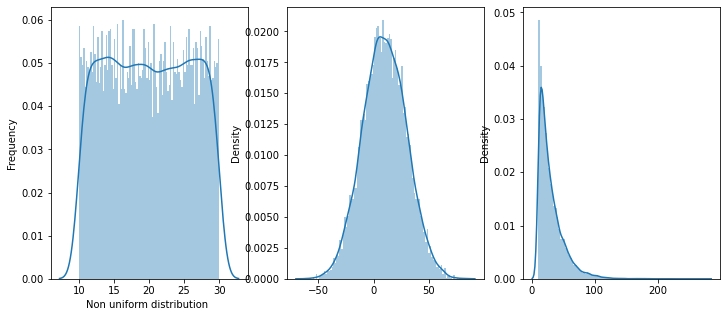

In [540]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sb.distplot(non,
            bins=100,
            ax=ax[1])
sb.distplot(uni,
            bins=100,
            ax=ax[0])
sb.distplot(exp,
            bins=100,
            ax=ax[2])
ax[0].set(xlabel='Uniform distribution ', ylabel='Frequency')
ax[0].set(xlabel='Non uniform distribution ', ylabel='Frequency')

In [541]:
from scipy.stats import entropy

In [542]:
[entropy(non, base=2),
entropy(uni, base=2),
entropy(exp, base=2)]

[-inf, 13.224956877933511, 13.019260641584792]

In [543]:
entropy([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], base=2)

2.584962500721156

In [544]:
entropy([3/6, 2/6, 1/6], base=2)

1.459147917027245

In [545]:
entropy([5/6, 1/6], base=2)

0.6500224216483541

In [546]:
entropy([1, 0], base=2)

0.0

### Answer
The amount of information in an event is propotional to the "surprise factor" in a uniform distrubution the surprise is distributet equaly and is of medium size for the whole set. For a non uniform distrubution the information is lower in the more probable events and high in the less probable. Which lowers the average info. AKA entropy

## Q3
__Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you
can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?__

In [547]:
import scipy.stats

In [548]:
infogain = list(map(lambda x: list(map(lambda y: dtree.averageGain(x, y), md.attributes)), data))

In [549]:
pd.DataFrame(infogain, index=["monk1", "monk2", "monk3"], columns=["a1","a2","a3","a4","a5","a6"])

,a1,a2,a3,a4,a5,a6
monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


In [550]:
list(map(max, infogain))

[0.28703074971578435, 0.01727717693791797, 0.29373617350838865]

### Answer
5
5
2

## Q4
__For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.__

In [551]:
def aGain(dataset, attribute):
    sets = []
    for v in attribute.values:
        subset = dtree.select(dataset, attribute, v)
        sets.append(subset)
    return sets

In [583]:
s2 = aGain(data[0], md.attributes[4])
s3 = [s2[0], aGain(s2[1], md.attributes[3]), aGain(s2[2], md.attributes[5]), aGain(s2[3], md.attributes[0])]

In [593]:
infogain2 = list(map(lambda x: list(map(lambda y: dtree.averageGain(x, y), md.attributes)), s2))
entro = list(map(dtree.entropy, s2))
entro


[0.0, 0.9383153522334069, 0.9480782435939054, 0.9081783472997051]

In [591]:
list(map(max, infogain2))

[0.0, 0.04889220262952931, 0.04510853782483648, 0.20629074641530198]

In [555]:
data[0][1].id

AttributeError: 'Sample' object has no attribute 'id'

In [560]:

[True, list(map(dtree.mostCommon, s3[1])),
list(map(dtree.mostCommon, s3[2])),
list(map(dtree.mostCommon, s3[3]))]

[True, [False, False, False], [False, False], [False, False, True]]

In [561]:
tt = dtree.buildTree(data[0], md.attributes, maxdepth=2)

In [562]:
import dectrees.python.drawtree_qt5 as drt

In [559]:
drt.drawTree(tt)

SystemExit: 0

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Q5
__Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.__

In [563]:
t1=dtree.buildTree(md.monk1, md.attributes);
t2=dtree.buildTree(md.monk2, md.attributes);
t3=dtree.buildTree(md.monk3, md.attributes);
print(dtree.check(t1, md.monk1))
print(dtree.check(t2, md.monk2))
print(dtree.check(t3, md.monk3))
print(dtree.check(t1, md.monk1test))
print(dtree.check(t2, md.monk2test))
print(dtree.check(t3, md.monk3test))

1.0
1.0
1.0
0.8287037037037037
0.6921296296296297
0.9444444444444444


## Q6
__Explain pruning from a bias variance trade-off perspective.__

### Answer
When building the full tree one is modeling wery close to the training data. It will probably be verry with verry high variance. When pruning the tree is made more and more general which will give itmore bias but lower the variance and probably fit the data a bit better

## Q7
__Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction.__

In [564]:
import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]



In [565]:


def checker(vals):
    def check(tree):
        return dtree.check(tree, vals)
    return check

def pruner(tree, test):
    func = checker(test)
    alternatives = dtree.allPruned(tree)
    vals = list(map(func, alternatives))
    best = tree
    for alt in alternatives:
        temp = func(alt)
        temp2 = func(best)
        if (temp > temp2):
                best = alt
    return best

def runner(tree, test):
    func = checker(test)
    tree2 = pruner(tree, test)
    cur = func(tree)
    new = func(tree2)
    while new > cur:
        tree2 = pruner(tree2, test)
        cur = new
        new = func(tree2)
    return tree2



In [572]:
monk1train, monk1val = partition(data[0], 0.6)
t4=dtree.buildTree(monk1train, md.attributes);
done = runner(t4, monk1val)
checker(monk1val)(done)

0.8

In [573]:
def prog1(data, goal):
    """l1 = np.linspace(0.3,0.8,6)"""
    l1 = [0.3,0.4,0.5,0.6,0.7,0.8]
    runs = 30
    res = []
    for l in l1:
        for r in range(runs):
            train, val = partition(data, l)
            t = dtree.buildTree(train, md.attributes);
            done = runner(t, val)
            res.append((l, dtree.check(done, goal)))
    return res

In [576]:
data1 = pd.DataFrame(prog1(data[0], md.monk1test), columns=["in", "out"])
"data2 = pd.DataFrame(prog1(data[1], md.monk2test), columns=["in", "out"])
data3 = pd.DataFrame(prog1(data[2], md.monk3test), columns=["in", "out"])
data1["Data"] = "Monk 1"
"data2["Data"] = "Monk 2"
data3["Data"] = "Monk 3"

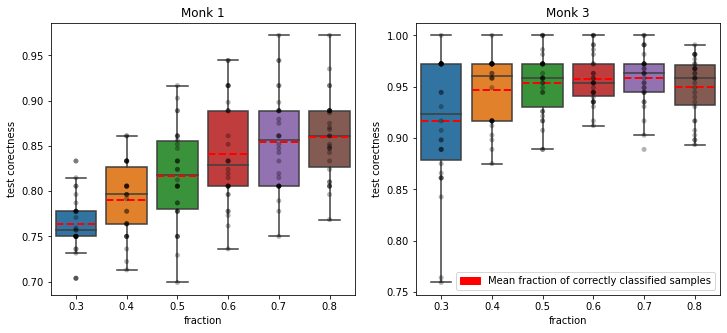

In [582]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sb.stripplot(x="in", y="out", data=data1,  color='black',alpha=0.3, jitter= False, ax=ax[0])
sb.boxplot( x="in", y="out", data=data1, showfliers = False, showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth' : 2}, ax=ax[0])
sb.stripplot(x="in", y="out", data=data3,  color='black',alpha=0.3, jitter= False, ax=ax[1])
sb.boxplot(x="in", y="out", data=data3, showfliers = False,showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth' : 2}, ax=ax[1])
red_patch = mpatches.Patch(color='red', label='Mean fraction of correctly classified samples')
plt.legend(handles=[red_patch])
ax[0].set(ylabel='test corectness', xlabel='fraction')
ax[1].set(ylabel='test corectness', xlabel='fraction')
ax[0].title.set_text('Monk 1')
ax[1].title.set_text('Monk 3')


